Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   longitude (degree: E+, W-)  latitude (degree: N+, S-)    Jan.    Feb.  \
0                      -177.5                        -89 -9999.0 -9999.0   
1                      -172.5                        -89 -9999.0 -9999.0   
2                      -167.5                        -89 -9999.0 -9999.0   
3                      -162.5                        -89 -9999.0 -9999.0   
4                      -157.5                        -89 -9999.0 -9999.0   

     Mar.    Apr.     May    Jun.    Jul.    Aug.   Sept.    Oct.    Nov.  \
0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
1 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
2 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
3 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
4 -9999.0 -9999.0 -9999.0 -99

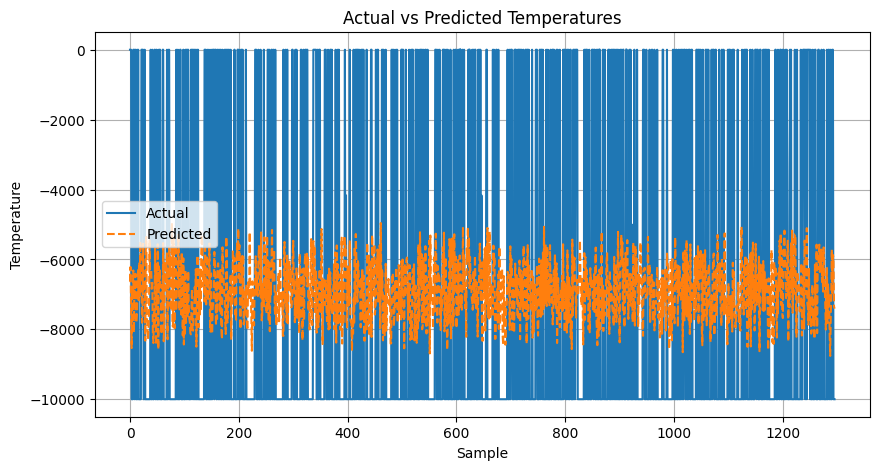

In [12]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Climate Data
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Intro to Machine Learning 4105/Level3pmR1.csv'
# Skip the first row which contains incorrect headers and use the second row as headers
df = pd.read_csv(file_path, header=1)

# 3. Explore Data
print(df.head())
print(df.describe())

# Optional: convert date
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')

# 4. Drop NA and prepare features
# Assuming 'Unnamed: 0' is longitude, 'Unnamed: 1' is latitude, and the rest are monthly data.
# Calculate the average of the monthly columns as the target variable 'avg_temp'
monthly_columns = df.columns[2:] # Assuming monthly data starts from the third column
df['avg_temp'] = df[monthly_columns].replace('-9999', np.nan).astype(float).mean(axis=1)

# Define X (features) and y (target)
# Using longitude and latitude as features - replace with relevant columns from your data
X = df[['longitude (degree: E+, W-)', 'latitude (degree: N+, S-)']] # Replace with actual column names from your data
y = df['avg_temp']

# Convert feature columns to numeric, coercing errors
X = X.apply(pd.to_numeric, errors='coerce')

# Combine features and target back for dropping NaNs
df_cleaned = pd.concat([X, y], axis=1)

# Drop rows with NaN values in features or target
df_cleaned = df_cleaned.dropna()

# Separate features and target again
X = df_cleaned[['longitude (degree: E+, W-)', 'latitude (degree: N+, S-)']]
y = df_cleaned['avg_temp']


# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Choose Model: Linear Regression or Random Forest
model = LinearRegression()
# model = RandomForestRegressor(n_estimators=100, random_state=42)

# 7. Train Model
model.fit(X_train, y_train)

# 8. Predict and Evaluate
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# 9. Plot Prediction vs Actual
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title("Actual vs Predicted Temperatures")
plt.xlabel("Sample")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()